In [1]:
import pandas as pd
import numpy as np
# from retentioneering import datasets
from typing import Literal, Union, List, Optional, Iterable, get_args, Dict, Tuple
import numpy as np 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def generate_user_events_data(num_users=1000, num_events=10, num_cities=10, num_os=2, num_rows=5000, seed=42):
    """
    Функция для генерации данных о событиях пользователей.
    """
    # Устанавливаем seed для генератора случайных чисел
    np.random.seed(seed)

    # Создаем список пользователей
    users = ['user' + str(i) for i in range(1, num_users+1)]

    # Создаем список событий
    events = ['event' + str(i) for i in range(1, num_events+1)]

    # Создаем список дат
    dates = [datetime.datetime.now() - datetime.timedelta(days=x) for x in range(180)]

    # Создаем список городов
    cities = ['city' + str(i) for i in range(1, num_cities+1)]

    # Создаем список операционных систем
    os = ['iOS', 'Android']

    # Создаем DataFrame
    df = pd.DataFrame({
        'user_id': np.random.choice(users, num_rows),
        'event': np.random.choice(events, num_rows),
        'event_datetime': np.random.choice(dates, num_rows),
        'city': np.random.choice(cities, num_rows),
        'operation_system': np.random.choice(os, num_rows)
    })

    return df

# Importing custom modules

In [3]:
import sys

sys.path.append('d:\\diplom\\product\\insight_pulse')

for path in sys.path:
    print(path)

D:\pythonProg\Python\Python312\python312.zip
D:\pythonProg\Python\Python312\DLLs
D:\pythonProg\Python\Python312\Lib
D:\pythonProg\Python\Python312
d:\diplom\.venv

d:\diplom\.venv\Lib\site-packages
d:\diplom\.venv\Lib\site-packages\win32
d:\diplom\.venv\Lib\site-packages\win32\lib
d:\diplom\.venv\Lib\site-packages\Pythonwin
d:\diplom\product\insight_pulse


In [4]:
from eventframing.eventframe import EventFrame
from eventframing.cols_schema import EventFrameColsSchema
from eventframing.event_type import EventType

from data_preprocessing.data_preprocessor import DataPreprocessor
from data_preprocessing.preprocessors_lib.add_start_end_events import AddStartEndEventsPreprocessor
from data_preprocessing.preprocessors_lib.split_sessions import SplitSessionsPreprocessor
from data_preprocessing.preprocessors_lib.add_cohorts_preprocessor import AddCohortsPreprocessor

from clustering.clustering_data_preprocessor import ClusteringDataPreprocessor
from clustering.estimators_lib.kmeans_estimator import KMeansEstimator
from clustering.estimators_lib.dbscan_estimator import DBScanEstimator

# Testing

## Data preprocessor test

In [5]:
data = generate_user_events_data(num_rows=5000)
cols_schema = {'user_id': 'user_id', 'event_timestamp': 'event_datetime', 'event_name': 'event'}
ef = EventFrame(data, cols_schema)
ef.to_dataframe().head()


,user_id,event,event_datetime,city,operation_system,event_id,event_type,event_type_index
1357,user1,event2,2024-10-21 18:55:56.955084,city5,Android,1357,raw,2
4234,user1,event6,2024-10-23 18:55:56.955084,city5,Android,4234,raw,2
2760,user1,event2,2024-11-12 18:55:56.955084,city6,iOS,2760,raw,2
4934,user1,event9,2024-11-24 18:55:56.955084,city3,iOS,4934,raw,2
1049,user1,event10,2024-12-22 18:55:56.955084,city1,iOS,1049,raw,2


In [6]:
dp = ClusteringDataPreprocessor()

In [7]:
dp.create_cluster_matrix(ef, add_path_stats=False, add_session_stats=False, preprocess=False).head()

event,user_id,event1,event10,event2,event3,event4,event5,event6,event7,event8,event9
0,user1,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
1,user10,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,user100,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,user1000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,user101,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
ss = SplitSessionsPreprocessor(timeout=15)

In [9]:
ef = ss.apply(ef)

In [10]:
dp.create_cluster_matrix(ef, add_path_stats=False, add_session_stats=True, preprocess=True).head()

,event1,event10,event2,event3,event4,event5,event6,event7,event8,event9,...,median_duration,min_gap,max_gap,mean_gap,median_gap,min_amount_of_steps,max_amount_of_steps,mean_amount_of_steps,median_amount_of_steps,user_id
0,-0.713068,0.624123,2.051767,-0.698983,-0.674350,-0.702280,3.297219,-0.749292,-0.677684,3.683174,...,0.0,0.0,-0.989730,-1.045756,-0.488639,-0.031814,-0.276103,-0.228974,-0.060202,user1
1,0.711628,0.624123,0.674172,0.753316,-0.674350,0.769235,0.619920,-0.749292,-0.677684,-0.719718,...,0.0,0.0,-0.078950,-0.374547,-0.370472,-0.031814,-0.276103,-0.228974,-0.060202,user10
2,0.711628,-0.729512,-0.703423,-0.698983,0.697938,-0.702280,0.619920,-0.749292,-0.677684,-0.719718,...,0.0,0.0,1.882729,1.407295,-0.882530,-0.031814,-0.276103,-0.228974,-0.060202,user100
3,0.711628,-0.729512,-0.703423,-0.698983,-0.674350,-0.702280,-0.718729,-0.749292,-0.677684,-0.719718,...,0.0,0.0,-1.970570,-1.982551,-1.433977,-0.031814,-0.276103,-0.228974,-0.060202,user1000
4,0.711628,-0.729512,0.674172,-0.698983,-0.674350,0.769235,-0.718729,-0.749292,0.727409,-0.719718,...,0.0,0.0,-1.129850,-1.265468,-1.079475,-0.031814,-0.276103,-0.228974,-0.060202,user101


In [11]:
ps = AddStartEndEventsPreprocessor()

In [12]:
ef = ps.apply(ef)

In [13]:
dp.create_cluster_matrix(ef, add_path_stats=True, add_session_stats=True, preprocess=True).head()

,event1,event10,event2,event3,event4,event5,event6,event7,event8,event9,...,max_gap,mean_gap,median_gap,min_amount_of_steps,max_amount_of_steps,mean_amount_of_steps,median_amount_of_steps,lifetime,amount_of_active_days,user_id
0,-0.713068,0.624123,2.051767,-0.698983,-0.674350,-0.702280,3.297219,-0.749292,-0.677684,3.683174,...,-0.989730,-1.045756,-0.488639,-0.031814,-0.276103,-0.228974,-0.060202,-0.245939,1.774411,user1
1,0.711628,0.624123,0.674172,0.753316,-0.674350,0.769235,0.619920,-0.749292,-0.677684,-0.719718,...,-0.078950,-0.374547,-0.370472,-0.031814,-0.276103,-0.228974,-0.060202,0.056295,0.449630,user10
2,0.711628,-0.729512,-0.703423,-0.698983,0.697938,-0.702280,0.619920,-0.749292,-0.677684,-0.719718,...,1.882729,1.407295,-0.882530,-0.031814,-0.276103,-0.228974,-0.060202,0.185824,-0.875150,user100
3,0.711628,-0.729512,-0.703423,-0.698983,-0.674350,-0.702280,-0.718729,-0.749292,-0.677684,-0.719718,...,-1.970570,-1.982551,-1.433977,-0.031814,-0.276103,-0.228974,-0.060202,-2.339987,-1.758336,user1000
4,0.711628,-0.729512,0.674172,-0.698983,-0.674350,0.769235,-0.718729,-0.749292,0.727409,-0.719718,...,-1.129850,-1.265468,-1.079475,-0.031814,-0.276103,-0.228974,-0.060202,-1.627579,-0.433556,user101


In [14]:
cm = dp.create_cluster_matrix(ef, add_path_stats=True, add_session_stats=True, preprocess=True)

In [15]:
(dp.inverse_transform(cm) != dp.create_cluster_matrix(ef, add_path_stats=True, add_session_stats=True, preprocess=False).loc[:, cm.columns]).sum()

{'user_id'}


event1                      0
event10                     0
event2                      0
event3                      0
event4                      0
event5                      0
event6                      0
event7                      0
event8                      0
event9                      0
amount_of_sessions          0
min_duration                0
max_duration                0
mean_duration               0
median_duration             0
min_gap                     0
max_gap                     0
mean_gap                  102
median_gap                  0
min_amount_of_steps         0
max_amount_of_steps         0
mean_amount_of_steps       41
median_amount_of_steps      0
lifetime                    0
amount_of_active_days       0
user_id                     0
dtype: int64

## KMeans test

In [16]:
cm = dp.create_cluster_matrix(ef, add_path_stats=True, add_session_stats=True, preprocess=True)

In [17]:
cm.head()

,event1,event10,event2,event3,event4,event5,event6,event7,event8,event9,...,max_gap,mean_gap,median_gap,min_amount_of_steps,max_amount_of_steps,mean_amount_of_steps,median_amount_of_steps,lifetime,amount_of_active_days,user_id
0,-0.713068,0.624123,2.051767,-0.698983,-0.674350,-0.702280,3.297219,-0.749292,-0.677684,3.683174,...,-0.989730,-1.045756,-0.488639,-0.031814,-0.276103,-0.228974,-0.060202,-0.245939,1.774411,user1
1,0.711628,0.624123,0.674172,0.753316,-0.674350,0.769235,0.619920,-0.749292,-0.677684,-0.719718,...,-0.078950,-0.374547,-0.370472,-0.031814,-0.276103,-0.228974,-0.060202,0.056295,0.449630,user10
2,0.711628,-0.729512,-0.703423,-0.698983,0.697938,-0.702280,0.619920,-0.749292,-0.677684,-0.719718,...,1.882729,1.407295,-0.882530,-0.031814,-0.276103,-0.228974,-0.060202,0.185824,-0.875150,user100
3,0.711628,-0.729512,-0.703423,-0.698983,-0.674350,-0.702280,-0.718729,-0.749292,-0.677684,-0.719718,...,-1.970570,-1.982551,-1.433977,-0.031814,-0.276103,-0.228974,-0.060202,-2.339987,-1.758336,user1000
4,0.711628,-0.729512,0.674172,-0.698983,-0.674350,0.769235,-0.718729,-0.749292,0.727409,-0.719718,...,-1.129850,-1.265468,-1.079475,-0.031814,-0.276103,-0.228974,-0.060202,-1.627579,-0.433556,user101


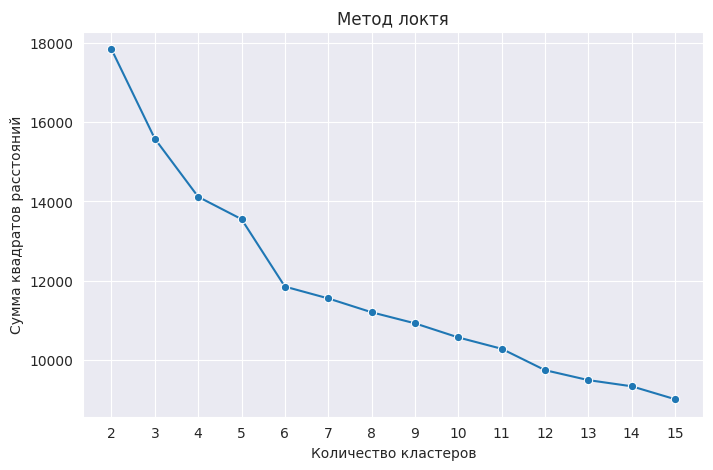

In [18]:
KMeansEstimator.choose_optimal_n_clusters([2, 15], cm.drop(columns=['user_id']))

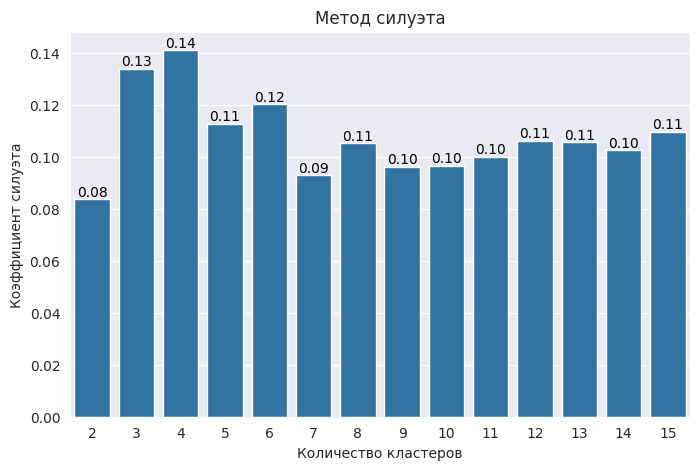

In [19]:
KMeansEstimator.choose_optimal_n_clusters([2, 15], cm.drop(columns=['user_id']), method='silhouette')

In [20]:
kmeans = KMeansEstimator(n_clusters=12)

In [21]:
kmeans.fit(cm.drop(columns=['user_id']))

KMeans(max_iter=1000, n_clusters=12)

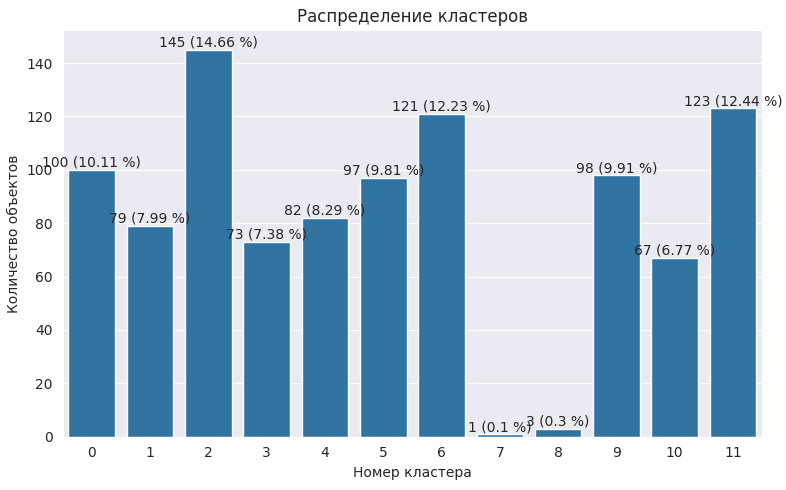

In [22]:
kmeans.plot_clusters_counts()

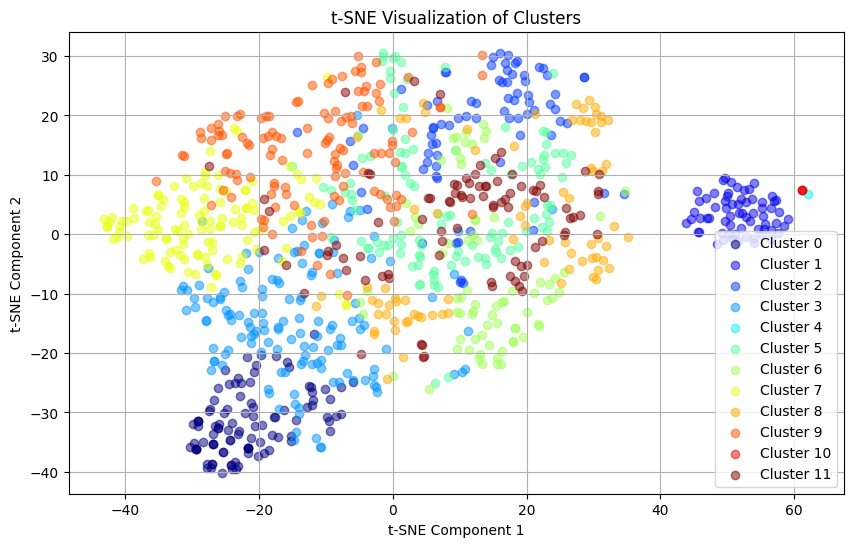

In [23]:
kmeans.plot_clusters_with_tsne(cm.drop(columns=['user_id']))

## DBSCAN test

In [24]:
cm = dp.create_cluster_matrix(ef, add_path_stats=True, add_session_stats=True, preprocess=True)

In [25]:
bd = DBScanEstimator(eps=2.5, min_samples=5)

In [26]:
bd.fit(cm.drop(columns=['user_id']))

DBSCAN(eps=2.5)

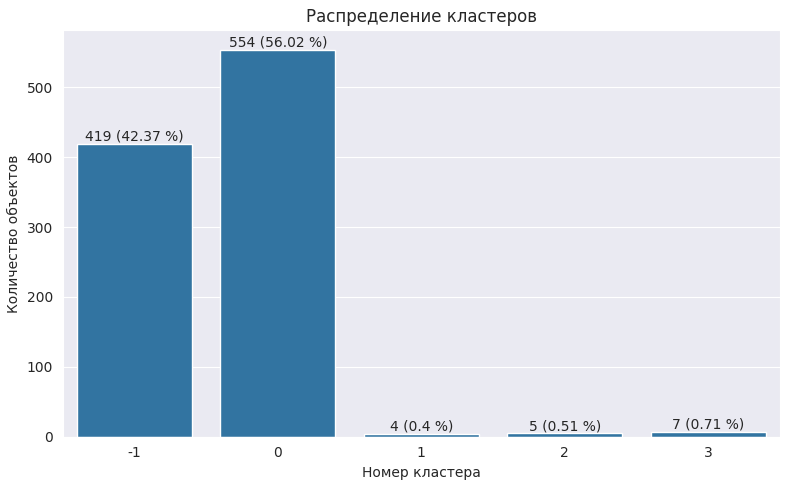

In [27]:
bd.plot_clusters_counts()

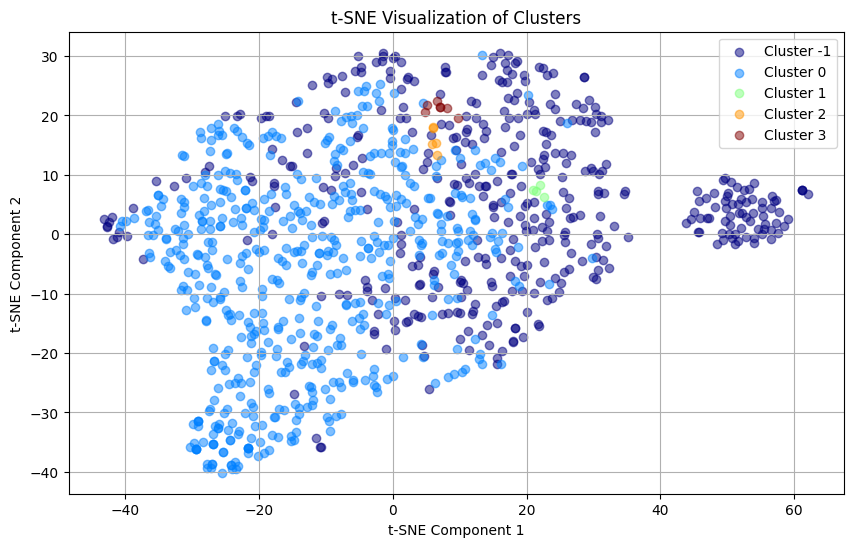

In [28]:
bd.plot_clusters_with_tsne(cm.drop(columns=['user_id']))